__Chapter 16 Problems__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

***
__Question 16.1__
 > Imagine that you are a stock trader, and that a portfolio manager plans to measure your trading prowess by comparing your execution prices with volume-weighted average prices. How would you attempt to look as good as possible by this measure? Would this always coincide with the best interests of the manager?

To look good on a VWAP (volume-weighted average price) measure, a trader could execute trades proportionally to market volumes, avoid market impact, and focus on low-volatility stocks. However, this might not align with the portfolio manager’s best interests in cases like time-sensitive trades, market timing opportunities, or illiquid stocks. Prioritizing VWAP can increase costs or delay execution. The best approach is to balance VWAP tracking with broader portfolio goals, ensuring alignment with the manager’s priorities and market conditions.

***
__Question 16.2__
 > Why is it more difficult to beat the bound in Eq. (16.10) with a portfolio of only 2 stocks than with a portfolio of 100 stocks?

A portfolio of 100 stocks offers diversification, flexibility, and lower idiosyncratic risks, making it easier to optimize trading and beat the cost-performance bound in Eq. (16.10). Conversely, the concentration and limited options in a 2-stock portfolio amplify execution challenges, increasing difficulty in outperforming the bound.

***
__Question 16.3__
 > A strategy can achieve 200 basis points of value added with 200 percent annual turnover. How much value-added should it achieve with 100 percent annual turnover? How much turnover is required in order to achieve 100 basis points of value added?

Note: **Rule of thumb**: &nbsp; You can often achieve 75% of the (incremental) value added with only half the turnover (and hence half the costs).

a) Value added with 100% annual turnover: 150.0 basis points


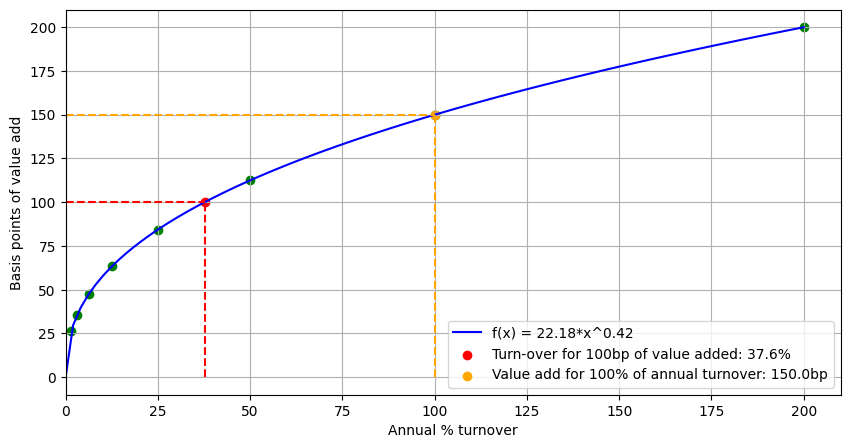

b) Approx Turnover required to achieve 100 basis points of value added: 37.6


In [2]:
bp_achieved = 200
turnover = 200

# Value added with 100% annual turnover
bp_achieved_100 = 0.75 * bp_achieved #75 percent of the value added with half the turnover
print(f'a) Value added with 100% annual turnover: {bp_achieved_100} basis points')

# generate some points on curve to solve
x_data, y_data = [], []
while bp_achieved > 25:
    x_data.append(turnover)
    y_data.append(bp_achieved)
    bp_achieved = 0.75 * bp_achieved
    turnover = 0.5 * turnover

# fit decay curve
def power_law(x, an, bn):
    return an * x**bn
params, covariance = curve_fit(power_law, x_data, y_data)
a, b = params

x_fit = np.linspace(0, max(x_data), 100)
y_fit = power_law(x_fit, a, b)
turnover_for_100bp = (100/a)**(1/b)

plt.figure(figsize=(10, 5))
plt.plot(x_fit, y_fit, label=f'f(x) = {a:.2f}*x^{b:.2f}', color='blue')
plt.scatter(x_data, y_data, color='green')
plt.scatter(turnover_for_100bp, 100, label=f'Turn-over for 100bp of value added: {turnover_for_100bp:.1f}%', color='red')
plt.vlines(x=turnover_for_100bp,ymin=0, ymax=100, color="red", linestyle="--")
plt.hlines(y=100,xmin=0, xmax=turnover_for_100bp, color="red", linestyle="--")
plt.scatter(100, bp_achieved_100, label=f'Value add for 100% of annual turnover: {bp_achieved_100:.1f}bp', color='orange')
plt.hlines(y=bp_achieved_100, xmin=0, xmax=100, color="orange", linestyle="--")
plt.vlines(x=100, ymin=0, ymax=bp_achieved_100, color="orange", linestyle="--")
plt.xlim(0, 210)
plt.xlabel('Annual % turnover')
plt.ylabel('Basis points of value add')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f'b) Approx Turnover required to achieve 100 basis points of value added: {turnover_for_100bp:.1f}')

***
__Question 16.4__
 > How would the presence of memory effects in market impact change the trade optimization results displayed in Fig. 16.5?

Memory affects are relevant if your trading is a significant proportion of daily volume (i.e. market impact effect).  The model market impact is proportional to the square of the stock accumulation effect.  The faster the portfolio holding changes the larger the market impact.

***
__Question 16.5__
 > In Fig. 16.5, why does high risk aversion lead to quick trading?

When risk aversion dominates over market impact it leads to quick trading as the equation solution approximates &nbsp; $1 - \exp(-g\cdot t)$ so the optimal schedule closely tracks the immediate execution benchmark.